In [66]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [106]:
# Initialize variables
m_s = 50   # Weight of rocket shell
g = 9.81   # Gravitational constant
rho = 1.091   # Density of air throughout flight
r = 0.5   # Maximum radius of the rocket
A = math.pi*r*r   # Maximum cross sectional area
v_e = 325   # Exhaust speed
C_D = 0.15   # Drag coefficient
m_p0 = 100   # Initial weight of the propellant at t=0
dt = 0.1   # Time step of 0.1 seconds

In [107]:
# Since we don't know what time the rocket will crash,
# I'm going to start by picking final time T=30 and see where that gets us
# This was later adjusted to 40 in order to include the impact point
T = 40
# With and end time I can initialize an array of times
t = numpy.arange(0, T+dt, dt)

In [108]:
# Initial conditions
# Assuming the rocket is starting on the ground and at zero velocity
h_0 = 0
v_0 = 0

In [109]:
# Create arrays to store h and v at each time step
h = numpy.zeros(numpy.size(t))
v = numpy.zeros(numpy.size(t))
h[0] = h_0
v[0] = v_0

In [110]:
# Find m_dot_p and m_p for all dt
m_dot_p = numpy.zeros(numpy.size(t))
m_p = numpy.zeros(numpy.size(t))
m_p[0] = m_p0

# Establish that m_dot_p = 20 when t is less than 5, and is 0 everywhere else
for n in range(0, numpy.size(t)):
    if t[n] < 5:
        m_dot_p[n] = 20
    else:
        m_dot_p[n] = 0

# Multiply m_dot_p by the time interval and subrtact it from the previous m_p
# value to get all values of m_p
for n in range(0, numpy.size(t)-1):
    m_p[n+1] = m_p[n] - (m_dot_p[n] * dt)

In [111]:
# Find the value of m_p at t=3.2
m_p[32]

36.0

In [112]:
# Now we need to find values for h and v and all times
for n in range(0, numpy.size(t)-1):
    v[n+1] = v[n] + (dt * (-g + ((1/(m_s + m_p[n])) * ((m_dot_p[n]* v_e) - (0.5* rho * v[n] * abs(v[n]) * A * C_D)))))
    h[n+1] = h[n] + (dt * v[n])

In [140]:
h

array([ 0.00000000e+00,  0.00000000e+00,  3.35233333e-01,  1.01150706e+00,
        2.03468495e+00,  3.41068452e+00,  5.14547367e+00,  7.24506708e+00,
        9.71552207e+00,  1.25629343e+01,  1.57934327e+01,  1.94131745e+01,
        2.34283390e+01,  2.78451219e+01,  3.26697279e+01,  3.79083639e+01,
        4.35672306e+01,  4.96525143e+01,  5.61703779e+01,  6.31269505e+01,
        7.05283175e+01,  7.83805089e+01,  8.66894876e+01,  9.54611366e+01,
        1.04701245e+02,  1.14415495e+02,  1.24609443e+02,  1.35288510e+02,
        1.46457956e+02,  1.58122870e+02,  1.70288146e+02,  1.82958465e+02,
        1.96138274e+02,  2.09831762e+02,  2.24042843e+02,  2.38775125e+02,
        2.54031891e+02,  2.69816071e+02,  2.86130214e+02,  3.02976463e+02,
        3.20356529e+02,  3.38271657e+02,  3.56722598e+02,  3.75709582e+02,
        3.95232285e+02,  4.15289797e+02,  4.35880595e+02,  4.57002505e+02,
        4.78652678e+02,  5.00827555e+02,  5.23522834e+02,  5.46733448e+02,
        5.69153526e+02,  

In [128]:
# Find the solutions to Assessment Question 2

# Discover the value of the maximum velocity
v_max = max(v)
print ('Maximum Velocity = ',v_max, '[m/s]')

# Discover at what time interval the velocity is maximum
for n in range(0,numpy.size(t)-1):
    if v[n] == v_max:
        t_v_max = n
        print('Time at Maximum Velocity = ',t_v_max/10, '[s]')
        
# Discover the altitude at the time of max velocity
h_v_max = h[t_v_max]
print('Altitude at Maximum Velocity = ',h_v_max, '[m]')

Maximum Velocity =  232.1061334126179 [m/s]
Time at Maximum Velocity =  5.0 [s]
Altitude at Maximum Velocity =  523.5228342918476 [m]


In [129]:
# Find the solutions to Assessment Question 3

# Discover the value of the maximum altitude
h_max = max(h)
print ('Maximum Altitude = ',h_max, '[m]')

# Discover the time at which maximum altitude occurs
for n in range(0,numpy.size(t)-1):
    if h[n] == h_max:
        t_h_max = n
        print('Time at Maximum Altitude = ',t_h_max/10, '[s]')

Maximum Altitude =  1334.1829454303067 [m]
Time at Maximum Altitude =  15.7 [s]


In [152]:
# Find the soutions to Assessment Question 4

# Discover when the rocket impacts the ground
for n in range(4,numpy.size(t)-1):
    if h[n] <= 0:
        t_h_impact = n-1
        print('Time of Impact = ',t_h_impact/10, '[s]')
        break

# Discover the Velocity at Time of Impact
v_impact = v[t_h_impact]
print('Velocity at Impact = ',v_impact, '[m/s]')
        

Time of Impact =  37.0 [s]
Velocity at Impact =  -85.9759134803524 [m/s]


Text(0,0.5,'Velocity [m/s]')

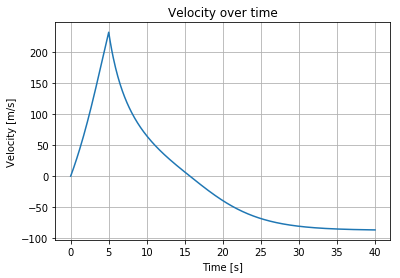

In [117]:
pyplot.plot(t, v);
pyplot.grid()
pyplot.title('Velocity over time')
pyplot.xlabel('Time [s]')
pyplot.ylabel('Velocity [m/s]')

Text(0,0.5,'Altitude [m]')

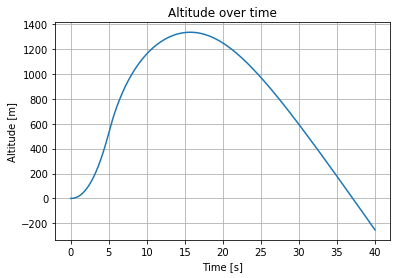

In [118]:
pyplot.plot(t, h);
pyplot.grid()
pyplot.title('Altitude over time')
pyplot.xlabel('Time [s]')
pyplot.ylabel('Altitude [m]')

In [144]:
min(abs(h[20:]))

2.4585813061592443

In [148]:
t_h_impact

1